32개 하나의 id로 만들기

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
import pandas as pd
import numpy as np

In [172]:
path1='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/finaldata_0826.xlsx'
#'/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/newdata_all_0819_normed_min.xlsx'

In [173]:
data= pd.read_excel(path1)

In [174]:
data

,x_1-0,y_1-0,x_2-1,y_2-1,x_3-2,y_3-2,x_4-3,y_4-3,x_5-4,y_5-4,x_6-5,y_6-5,x_7-6,y_7-6,x_8-7,y_8-7,x_9-8,y_9-8,x_10-9,y_10-9,x_11-10,y_11-10,x_12-11,y_12-11,x_13-12,y_13-12,x_14-13,y_14-13,x_15-14,y_15-14,x_16-15,y_16-15,d_ratio,d_ratio_sq,sin dif,엄지 중지 내적,검지 중지 내적,y,image
0,-0.097386,-0.317665,-0.582782,-1.650816,-0.754504,-1.535439,-0.758110,-1.403414,2.015508,0.221975,-1.375666,-0.821102,-0.989515,0.356967,-0.743485,0.566249,2.762563,0.011589,-1.390067,-0.794538,-0.937136,0.678444,-0.716828,0.834541,2.737856,-0.291565,-1.131854,-0.030336,-0.296096,1.208562,-0.223240,0.974763,2.754793,7.588885,-0.410957,-0.357743,0.977981,1,correct18.MP4_000003.040.jpg
1,-0.097696,-0.434478,-0.530682,-1.700158,-0.747303,-1.493090,-0.700252,-1.327300,2.120896,0.307649,-1.292999,-0.709170,-0.944578,0.328847,-0.711517,0.599622,2.494309,-0.142994,-1.367539,-0.672766,-0.915622,0.671128,-0.728103,0.850291,2.593228,-0.498012,-1.174490,0.180443,-0.280763,1.304564,-0.222701,0.974887,2.474844,6.124852,-0.415779,-0.368311,0.986843,1,correct18.MP4_000003.160.jpg
2,-0.041711,-1.354691,-0.734899,-2.175554,-1.177719,-1.934394,-0.949919,-1.924305,2.678537,0.426290,-1.690685,-0.779194,-1.160758,0.536027,-0.756683,0.823056,2.897922,-0.218650,-1.718170,-0.769372,-1.178799,1.006795,-0.688852,0.952079,2.988419,-0.572803,-1.525631,-0.002475,-0.662021,1.532212,-0.303469,0.952841,1.658572,2.750861,-0.180847,-0.467011,0.993155,1,correct18.MP4_000003.640.jpg
3,-0.079632,-1.258210,-0.641863,-2.028964,-0.907833,-1.675988,-0.808480,-1.497007,2.018738,0.654078,-1.389198,-0.883864,-1.043890,0.340855,-0.776948,0.696822,2.599454,0.174436,-1.433933,-0.696877,-1.027934,0.736085,-0.665327,0.914524,2.606360,-0.446073,-1.244587,-0.179655,-0.647670,1.115677,-0.418885,0.908039,1.147183,1.316029,-0.117288,-0.431956,0.977872,1,correct18.MP4_000003.761.jpg
4,-0.253392,-1.441579,-0.685189,-1.983205,-0.970009,-1.691725,-0.794451,-1.795269,2.325695,0.220472,-1.643168,-0.564511,-1.171413,0.578292,-0.774101,0.611475,3.001122,-0.120818,-1.610056,-0.298993,-0.872849,1.329783,-0.372155,1.015364,2.334615,-1.404302,-1.284908,0.195288,-0.294960,1.610369,-0.015670,0.999877,0.820459,0.673153,0.131300,-0.719344,0.852046,1,correct18.MP4_000003.880.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,-0.001589,-3.040612,0.226711,-3.692383,0.365606,-2.901081,0.461906,-2.780889,-0.954719,3.977435,0.418422,-3.095655,0.552016,-1.706414,0.563291,-1.182662,-1.336750,6.678570,0.179356,-2.936343,0.413889,-1.356818,0.403498,-1.095053,-0.810018,6.104883,0.168824,-2.459373,0.277418,-1.241298,0.276109,-0.961126,1.083443,1.173849,-0.059374,0.982298,0.995820,0,not_correct7.mp4_000004.574.jpg
2081,-0.904720,-3.382087,-0.136956,-4.093858,0.137966,-3.229617,0.336361,-2.935153,0.417988,3.224375,0.497927,-3.696444,0.391217,-1.887897,0.294931,-1.272042,-0.822453,7.113460,0.472395,-3.794752,0.335370,-1.897989,0.385008,-1.097767,-0.925893,7.398620,0.389961,-3.263557,0.227379,-1.886734,0.193145,-0.981170,2.589555,6.705795,-0.025514,0.975191,0.994013,0,not_correct7.mp4_000005.110.jpg
2082,-0.806689,-2.435328,-0.174693,-2.660553,0.061701,-2.150159,0.194296,-1.810301,0.077999,2.328325,-0.769337,-2.119675,-0.931329,-0.315565,-0.707735,0.416584,2.498143,2.105267,-0.963533,-2.543564,-1.202535,-0.224997,-0.950166,0.734959,3.207447,2.347889,-0.979045,-2.035890,-1.188673,-0.093816,-0.895738,0.444582,1.089991,1.188080,0.035518,-0.692750,0.992026,0,not_correct7.mp4_000005.377.jpg
2083,-0.857359,-1.959267,-0.181484,-1.863195,0.016917,-1.413289,0.369248,-1.042282,-0.128924,1.164268,-0.444784,-1.788333,-0.605044,-0.008118,-0.409710,0.675791,1.790943,1.171561,-0.397461,-1.886762,-0.716980,0.440074,-0.523609,0.900872,1.970419,0.696214,-0.315221,-1.725326,-0.657011,0.504756,-0.521417,0.853302,0.899224,0.808603,0.443340,-0.982747,0.999829,0,not_correct7.mp4_000005.507.jpg


In [175]:
data[data['y']==1].image.str[0:9].value_counts() #20

correct36    100
correct28    100
correct27    100
correct20    100
correct31     98
correct35     98
correct29     96
correct30     95
correct4.     85
correct19     82
correct38     81
correct22     78
correct41     77
correct3.     73
correct18     70
correct33     68
correct23     47
correct26     47
correct5.     37
correct21     36
correct32     25
correct34      2
correct39      1
Name: image, dtype: int64

In [176]:
data[data['y']==0].image.str[0:14].value_counts() #6

not_correct11.    100
not_correct6.m     96
not_correct12.     88
not_correct10.     85
not_correct13.     77
not_correct7.m     36
not_correct18.      7
Name: image, dtype: int64

In [177]:
print(data[data.image.str.startswith('not_correct11')].index[0])
print(data[data.image.str.startswith('not_correct6.')].index[0])
print(data[data.image.str.startswith('not_correct12')].index[0])
print(data[data.image.str.startswith('not_correct10')].index[0])
print(data[data.image.str.startswith('not_correct13')].index[0])
print(data[data.image.str.startswith('not_correct7.')].index[0])

1681
1953
1781
1596
1869
2049


In [178]:
print(data[data.image.str.startswith('correct27')].index[0])
print(data[data.image.str.startswith('correct36')].index[0])
print(data[data.image.str.startswith('correct20')].index[0])
print(data[data.image.str.startswith('correct28')].index[0])
print(data[data.image.str.startswith('correct35')].index[0])
print(data[data.image.str.startswith('correct31')].index[0])
print(data[data.image.str.startswith('correct29')].index[0])

print(data[data.image.str.startswith('correct30')].index[0])
print(data[data.image.str.startswith('correct4.')].index[0])
print(data[data.image.str.startswith('correct19')].index[0])
print(data[data.image.str.startswith('correct38')].index[0])
print(data[data.image.str.startswith('correct3.')].index[0])
print(data[data.image.str.startswith('correct41')].index[0])
print(data[data.image.str.startswith('correct18')].index[0])
print(data[data.image.str.startswith('correct22')].index[0])
print(data[data.image.str.startswith('correct33')].index[0])
print(data[data.image.str.startswith('correct26')].index[0])
print(data[data.image.str.startswith('correct23')].index[0])
print(data[data.image.str.startswith('correct5.')].index[0])
print(data[data.image.str.startswith('correct21')].index[0])

460
1215
152
560
1117
924
660
829
1397
70
1315
756
1482
0
288
1047
413
366
1559
252


In [179]:
data.columns

Index(['x_1-0', 'y_1-0', 'x_2-1', 'y_2-1', 'x_3-2', 'y_3-2', 'x_4-3', 'y_4-3',
       'x_5-4', 'y_5-4', 'x_6-5', 'y_6-5', 'x_7-6', 'y_7-6', 'x_8-7', 'y_8-7',
       'x_9-8', 'y_9-8', 'x_10-9', 'y_10-9', 'x_11-10', 'y_11-10', 'x_12-11',
       'y_12-11', 'x_13-12', 'y_13-12', 'x_14-13', 'y_14-13', 'x_15-14',
       'y_15-14', 'x_16-15', 'y_16-15', 'd_ratio', 'd_ratio_sq', 'sin dif',
       '엄지 중지 내적', '검지 중지 내적', 'y', 'image'],
      dtype='object')

In [180]:
len(data.columns)

39

In [181]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

##데이터 변형

In [182]:
data['id'] = -1
data['time'] = -1

In [183]:
index = [1681,1713, 1745, 1953,1985,2017, 1781,1813,1596,1628, 1869,1901, 2049,
         460, 492, 524, 1215, 1247, 1279, 152, 184, 216, 560, 592, 624, 1117, 1149, 1181, 924, 956, 988, 660, 692, 724,
         829,861, 1397,1429, 70, 102, 1315, 1347, 756, 788, 1482, 1514, 0, 32, 288, 320, 1047, 1079, 413, 366, 1559, 252] #시작 index

for i,j in enumerate(index):
  data[j: j+32]['id'] = i
  data[j: j+32]['time'] = range(0,32)

data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,x_1-0,y_1-0,x_2-1,y_2-1,x_3-2,y_3-2,x_4-3,y_4-3,x_5-4,y_5-4,x_6-5,y_6-5,x_7-6,y_7-6,x_8-7,y_8-7,x_9-8,y_9-8,x_10-9,y_10-9,x_11-10,y_11-10,x_12-11,y_12-11,x_13-12,y_13-12,x_14-13,y_14-13,x_15-14,y_15-14,x_16-15,y_16-15,d_ratio,d_ratio_sq,sin dif,엄지 중지 내적,검지 중지 내적,y,image,id,time
0,-0.097386,-0.317665,-0.582782,-1.650816,-0.754504,-1.535439,-0.758110,-1.403414,2.015508,0.221975,-1.375666,-0.821102,-0.989515,0.356967,-0.743485,0.566249,2.762563,0.011589,-1.390067,-0.794538,-0.937136,0.678444,-0.716828,0.834541,2.737856,-0.291565,-1.131854,-0.030336,-0.296096,1.208562,-0.223240,0.974763,2.754793,7.588885,-0.410957,-0.357743,0.977981,1,correct18.MP4_000003.040.jpg,46,0
1,-0.097696,-0.434478,-0.530682,-1.700158,-0.747303,-1.493090,-0.700252,-1.327300,2.120896,0.307649,-1.292999,-0.709170,-0.944578,0.328847,-0.711517,0.599622,2.494309,-0.142994,-1.367539,-0.672766,-0.915622,0.671128,-0.728103,0.850291,2.593228,-0.498012,-1.174490,0.180443,-0.280763,1.304564,-0.222701,0.974887,2.474844,6.124852,-0.415779,-0.368311,0.986843,1,correct18.MP4_000003.160.jpg,46,1
2,-0.041711,-1.354691,-0.734899,-2.175554,-1.177719,-1.934394,-0.949919,-1.924305,2.678537,0.426290,-1.690685,-0.779194,-1.160758,0.536027,-0.756683,0.823056,2.897922,-0.218650,-1.718170,-0.769372,-1.178799,1.006795,-0.688852,0.952079,2.988419,-0.572803,-1.525631,-0.002475,-0.662021,1.532212,-0.303469,0.952841,1.658572,2.750861,-0.180847,-0.467011,0.993155,1,correct18.MP4_000003.640.jpg,46,2
3,-0.079632,-1.258210,-0.641863,-2.028964,-0.907833,-1.675988,-0.808480,-1.497007,2.018738,0.654078,-1.389198,-0.883864,-1.043890,0.340855,-0.776948,0.696822,2.599454,0.174436,-1.433933,-0.696877,-1.027934,0.736085,-0.665327,0.914524,2.606360,-0.446073,-1.244587,-0.179655,-0.647670,1.115677,-0.418885,0.908039,1.147183,1.316029,-0.117288,-0.431956,0.977872,1,correct18.MP4_000003.761.jpg,46,3
4,-0.253392,-1.441579,-0.685189,-1.983205,-0.970009,-1.691725,-0.794451,-1.795269,2.325695,0.220472,-1.643168,-0.564511,-1.171413,0.578292,-0.774101,0.611475,3.001122,-0.120818,-1.610056,-0.298993,-0.872849,1.329783,-0.372155,1.015364,2.334615,-1.404302,-1.284908,0.195288,-0.294960,1.610369,-0.015670,0.999877,0.820459,0.673153,0.131300,-0.719344,0.852046,1,correct18.MP4_000003.880.jpg,46,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,-0.001589,-3.040612,0.226711,-3.692383,0.365606,-2.901081,0.461906,-2.780889,-0.954719,3.977435,0.418422,-3.095655,0.552016,-1.706414,0.563291,-1.182662,-1.336750,6.678570,0.179356,-2.936343,0.413889,-1.356818,0.403498,-1.095053,-0.810018,6.104883,0.168824,-2.459373,0.277418,-1.241298,0.276109,-0.961126,1.083443,1.173849,-0.059374,0.982298,0.995820,0,not_correct7.mp4_000004.574.jpg,12,31
2081,-0.904720,-3.382087,-0.136956,-4.093858,0.137966,-3.229617,0.336361,-2.935153,0.417988,3.224375,0.497927,-3.696444,0.391217,-1.887897,0.294931,-1.272042,-0.822453,7.113460,0.472395,-3.794752,0.335370,-1.897989,0.385008,-1.097767,-0.925893,7.398620,0.389961,-3.263557,0.227379,-1.886734,0.193145,-0.981170,2.589555,6.705795,-0.025514,0.975191,0.994013,0,not_correct7.mp4_000005.110.jpg,-1,-1
2082,-0.806689,-2.435328,-0.174693,-2.660553,0.061701,-2.150159,0.194296,-1.810301,0.077999,2.328325,-0.769337,-2.119675,-0.931329,-0.315565,-0.707735,0.416584,2.498143,2.105267,-0.963533,-2.543564,-1.202535,-0.224997,-0.950166,0.734959,3.207447,2.347889,-0.979045,-2.035890,-1.188673,-0.093816,-0.895738,0.444582,1.089991,1.188080,0.035518,-0.692750,0.992026,0,not_correct7.mp4_000005.377.jpg,-1,-1
2083,-0.857359,-1.959267,-0.181484,-1.863195,0.016917,-1.413289,0.369248,-1.042282,-0.128924,1.164268,-0.444784,-1.788333,-0.605044,-0.008118,-0.409710,0.675791,1.790943,1.171561,-0.397461,-1.886762,-0.716980,0.440074,-0.523609,0.900872,1.970419,0.696214,-0.315221,-1.725326,-0.657011,0.504756,-0.521417,0.853302,0.899224,0.808603,0.443340,-0.982747,0.999829,0,not_correct7.mp4_000005.507.j

In [184]:
for i in range(len(data)):
  if data['id'][i] == -1:
    data.drop(i, axis=0, inplace=True)

In [185]:
data.reset_index(drop=True, inplace=True)

In [186]:
data

,x_1-0,y_1-0,x_2-1,y_2-1,x_3-2,y_3-2,x_4-3,y_4-3,x_5-4,y_5-4,x_6-5,y_6-5,x_7-6,y_7-6,x_8-7,y_8-7,x_9-8,y_9-8,x_10-9,y_10-9,x_11-10,y_11-10,x_12-11,y_12-11,x_13-12,y_13-12,x_14-13,y_14-13,x_15-14,y_15-14,x_16-15,y_16-15,d_ratio,d_ratio_sq,sin dif,엄지 중지 내적,검지 중지 내적,y,image,id,time
0,-0.097386,-0.317665,-0.582782,-1.650816,-0.754504,-1.535439,-0.758110,-1.403414,2.015508,0.221975,-1.375666,-0.821102,-0.989515,0.356967,-0.743485,0.566249,2.762563,0.011589,-1.390067,-0.794538,-0.937136,0.678444,-0.716828,0.834541,2.737856,-0.291565,-1.131854,-0.030336,-0.296096,1.208562,-0.223240,0.974763,2.754793,7.588885,-0.410957,-0.357743,0.977981,1,correct18.MP4_000003.040.jpg,46,0
1,-0.097696,-0.434478,-0.530682,-1.700158,-0.747303,-1.493090,-0.700252,-1.327300,2.120896,0.307649,-1.292999,-0.709170,-0.944578,0.328847,-0.711517,0.599622,2.494309,-0.142994,-1.367539,-0.672766,-0.915622,0.671128,-0.728103,0.850291,2.593228,-0.498012,-1.174490,0.180443,-0.280763,1.304564,-0.222701,0.974887,2.474844,6.124852,-0.415779,-0.368311,0.986843,1,correct18.MP4_000003.160.jpg,46,1
2,-0.041711,-1.354691,-0.734899,-2.175554,-1.177719,-1.934394,-0.949919,-1.924305,2.678537,0.426290,-1.690685,-0.779194,-1.160758,0.536027,-0.756683,0.823056,2.897922,-0.218650,-1.718170,-0.769372,-1.178799,1.006795,-0.688852,0.952079,2.988419,-0.572803,-1.525631,-0.002475,-0.662021,1.532212,-0.303469,0.952841,1.658572,2.750861,-0.180847,-0.467011,0.993155,1,correct18.MP4_000003.640.jpg,46,2
3,-0.079632,-1.258210,-0.641863,-2.028964,-0.907833,-1.675988,-0.808480,-1.497007,2.018738,0.654078,-1.389198,-0.883864,-1.043890,0.340855,-0.776948,0.696822,2.599454,0.174436,-1.433933,-0.696877,-1.027934,0.736085,-0.665327,0.914524,2.606360,-0.446073,-1.244587,-0.179655,-0.647670,1.115677,-0.418885,0.908039,1.147183,1.316029,-0.117288,-0.431956,0.977872,1,correct18.MP4_000003.761.jpg,46,3
4,-0.253392,-1.441579,-0.685189,-1.983205,-0.970009,-1.691725,-0.794451,-1.795269,2.325695,0.220472,-1.643168,-0.564511,-1.171413,0.578292,-0.774101,0.611475,3.001122,-0.120818,-1.610056,-0.298993,-0.872849,1.329783,-0.372155,1.015364,2.334615,-1.404302,-1.284908,0.195288,-0.294960,1.610369,-0.015670,0.999877,0.820459,0.673153,0.131300,-0.719344,0.852046,1,correct18.MP4_000003.880.jpg,46,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0.592734,-2.642438,-0.053463,-4.330221,-0.253222,-3.793907,0.287968,-3.521989,0.005389,3.769794,-0.464769,-3.870031,-1.101980,-0.962342,-0.980361,0.724655,1.536206,4.333237,-0.663737,-4.337828,-1.337441,-0.977040,-0.938564,0.884082,2.035871,5.168524,-0.861618,-3.406529,-1.108095,-0.474330,-0.737290,0.675576,1.474697,2.174732,-0.139077,-0.742702,0.992930,0,not_correct7.mp4_000003.910.jpg,12,27
1788,0.139286,-2.839082,-0.212114,-4.389487,-0.197210,-3.663479,0.658489,-3.073728,-0.166421,3.397180,-0.417473,-3.682427,-0.932292,-1.102605,-0.848372,0.425682,1.390688,4.587539,-0.638947,-3.970077,-1.222627,-1.209108,-0.888064,0.703322,1.959313,5.248748,-1.010633,-2.724036,-1.182922,-0.490043,-0.722187,0.691698,2.118955,4.489970,-0.293642,-0.771292,0.979108,0,not_correct7.mp4_000004.040.jpg,12,28
1789,0.507657,-1.995695,0.081537,-3.308183,-0.056921,-2.936226,0.295622,-2.087511,-0.277277,1.992003,-0.563523,-2.850347,-1.102773,0.194854,-0.808582,0.962738,1.654731,1.909132,-0.613107,-3.125706,-1.096209,0.448911,-0.689290,1.167650,1.698847,2.115697,-0.714396,-2.075015,-0.980227,0.502988,-0.674257,0.738497,1.712876,2.933945,0.128018,-0.923920,0.986367,0,not_correct7.mp4_000004.174.jpg,12,29
1790,-0.260243,-2.892645,0.245234,-3.006993,0.424812,-2.232363,0.477138,-2.095198,-0.797339,3.482158,0.356959,-2.653027,0.533264,-1.474313,0.570956,-1.023024,-1.190890,5.681647,0.234329,-2.724536,0.439138,-1.423440,0.413936,-1.023404,-0.868710,5.663432,0.213644,-2.463283,0.331661,-1.399991,0.329220,-0.944253,1.643938,2.702531,-0.018804,0.987157,0.992236,0,not_correct7.mp4_000004.

In [187]:
data[data["y"]==0].id.value_counts()

12    32
11    32
10    32
9     32
8     32
7     32
6     32
5     32
4     32
3     32
2     32
1     32
0     32
Name: id, dtype: int64

In [188]:
data[data["y"]==1].id.value_counts()

55    32
23    32
31    32
30    32
29    32
28    32
27    32
26    32
25    32
24    32
22    32
33    32
21    32
20    32
19    32
18    32
17    32
16    32
15    32
14    32
32    32
34    32
54    32
45    32
53    32
52    32
51    32
50    32
49    32
48    32
47    32
46    32
44    32
35    32
43    32
42    32
41    32
40    32
39    32
38    32
37    32
36    32
13    32
Name: id, dtype: int64

In [189]:
X_labels = pd.DataFrame(data["id"].value_counts().index, columns=['id'])
X_labels["label"] = -1

for i in range(len(X_labels)):
  if X_labels["id"][i] in range(13): #올바르지 않은 13개
    X_labels["label"][i] = 0
  else:                       #올바른 43 개
    X_labels["label"][i] = 1

print(X_labels)

    id  label
0   55      1
1   54      1
2   25      1
3   24      1
4   23      1
5   22      1
6   21      1
7   20      1
8   19      1
9   18      1
10  17      1
11  16      1
12  15      1
13  14      1
14  13      1
15  12      0
16  11      0
17  10      0
18   9      0
19   8      0
20   7      0
21   6      0
22   5      0
23   4      0
24   3      0
25   2      0
26   1      0
27  26      1
28  27      1
29  28      1
30  42      1
31  53      1
32  52      1
33  51      1
34  50      1
35  49      1
36  48      1
37  47      1
38  46      1
39  45      1
40  44      1
41  43      1
42  41      1
43  29      1
44  40      1
45  39      1
46  38      1
47  37      1
48  36      1
49  35      1
50  34      1
51  33      1
52  32      1
53  31      1
54  30      1
55   0      0


In [190]:
data.drop(['image'], axis=1, inplace = True)

In [191]:
#data.to_excel('data0826.xlsx', index=False)

In [192]:
data.drop(['y'], axis=1, inplace = True)

#LSTM

데이터셋 분리

In [193]:
temp_y = data[data["id"] <=9]
temp_x1 = data["id"] >=13
temp_x2 = data["id"] <=45
temp_x = data[temp_x1 & temp_x2]
train = pd.concat([temp_y,temp_x], axis=0)
test = data.drop(train.index, axis=0)

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [194]:
temp_y = X_labels[X_labels["id"] <=9]
temp_x1 = X_labels["id"] >=13
temp_x2 = X_labels["id"] <=45
temp_x = X_labels[temp_x1 & temp_x2]
train_labels = pd.concat([temp_y,temp_x], axis=0)
test_labels = X_labels.drop(train_labels.index, axis=0)

train_labels.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)

In [195]:
train = train.sort_values(by = ['id','time'])

In [196]:
train

,x_1-0,y_1-0,x_2-1,y_2-1,x_3-2,y_3-2,x_4-3,y_4-3,x_5-4,y_5-4,x_6-5,y_6-5,x_7-6,y_7-6,x_8-7,y_8-7,x_9-8,y_9-8,x_10-9,y_10-9,x_11-10,y_11-10,x_12-11,y_12-11,x_13-12,y_13-12,x_14-13,y_14-13,x_15-14,y_15-14,x_16-15,y_16-15,d_ratio,d_ratio_sq,sin dif,엄지 중지 내적,검지 중지 내적,id,time
64,-0.930127,-1.589395,-1.162475,-2.447782,-1.068506,-1.901830,-1.009512,-1.589251,2.588780,1.636438,-1.543076,-0.791569,-1.148330,0.533601,-0.814237,0.733005,3.337135,0.162127,-1.608600,-0.624991,-0.934187,0.986669,-0.518975,1.048312,2.903142,-0.656928,-1.421722,-0.338097,-0.804712,0.714069,-0.419461,0.907773,0.424517,0.180214,0.448109,-0.518590,0.929344,0,0
65,-1.273470,-2.670864,-1.427497,-2.733129,-1.301660,-2.089694,-1.334298,-1.753630,2.792840,2.396956,-1.634327,-1.527981,-1.180155,0.414074,-0.762314,0.944149,3.467773,1.076907,-1.776688,-1.225581,-1.060223,0.720584,-0.640292,1.031778,3.366308,0.494493,-1.535540,-1.044698,-0.920721,0.444122,-0.500063,0.865989,0.538405,0.289880,0.395852,-0.356913,0.992342,0,1
66,-1.255078,-2.063387,-1.335154,-2.724139,-1.170377,-2.195215,-1.207463,-1.919017,2.969286,2.270207,-1.667052,-1.300529,-1.296877,0.424230,-0.835438,0.850995,3.701540,0.732634,-1.838739,-0.943402,-1.085088,0.745420,-0.615365,0.950991,3.401118,0.125522,-1.619682,-0.662131,-0.952579,0.515540,-0.528151,0.849150,0.589493,0.347502,0.381705,-0.421281,0.979696,0,2
67,-1.568979,-2.914607,-1.506035,-2.853270,-1.191492,-2.050545,-1.240562,-1.967683,2.997609,2.294489,-1.661703,-1.050169,-1.243411,0.770113,-0.696861,1.127708,3.489440,0.138865,-1.796495,-0.861099,-1.123096,0.784844,-0.583249,1.026125,3.388139,0.077411,-1.521925,-0.740585,-0.984915,0.360251,-0.493582,0.869699,0.630687,0.397766,0.309518,-0.471873,0.999328,0,3
68,-0.897385,-1.967863,-1.100728,-2.738119,-1.146704,-2.103642,-1.112492,-1.501359,2.667308,2.017832,-1.608566,-0.916809,-1.205880,0.201080,-0.889577,0.476665,3.584805,0.871901,-1.772641,-0.607801,-0.939006,0.870341,-0.584051,1.005898,3.131334,-0.528344,-1.547034,-0.455068,-0.835657,0.675745,-0.467856,0.883805,0.296752,0.088062,0.604961,-0.395888,0.851035,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,-1.338203,-4.254305,-0.838107,-3.666255,-0.719875,-2.666221,-0.834907,-2.614097,3.184105,3.969987,-1.002716,-1.945530,-1.126042,-0.645799,-0.924314,-0.098873,3.093499,3.770827,-1.347855,-1.934627,-1.218512,-0.052309,-0.822239,0.704905,3.305738,2.374564,-1.347885,-1.341082,-1.079030,0.095558,-0.670443,0.741961,0.751156,0.564235,0.339686,-0.389022,0.685664,45,27
1372,-0.869329,-3.487276,-0.653526,-3.213078,-0.603720,-2.238850,-0.723330,-2.281296,2.536583,3.318753,-1.042002,-2.046063,-1.133033,-0.751420,-0.891721,-0.167663,2.883077,3.941518,-1.288484,-1.806760,-1.217785,-0.358238,-0.880791,0.348143,3.117058,2.830999,-1.313919,-1.290579,-1.063455,0.084628,-0.635566,0.772047,1.098797,1.207355,-0.065972,-0.069317,0.846049,45,28
1373,-1.108523,-3.692097,-0.898059,-3.423380,-0.711956,-2.382010,-0.829683,-2.344670,2.297518,4.103722,-1.068851,-2.298316,-1.072042,-1.060778,-0.885198,-0.541440,3.014732,4.971488,-1.458664,-1.908491,-1.297812,-0.305735,-0.962275,0.198857,3.680179,3.073412,-1.376659,-1.458229,-1.036814,0.236211,-0.622430,0.782675,0.892366,0.796316,0.093263,0.135902,0.729823,45,29
1374,-0.999219,-3.314051,-0.820536,-3.202531,-0.701254,-2.226001,-0.723145,-2.246845,2.391882,3.577494,-0.947234,-2.122081,-0.995494,-0.812682,-0.852551,-0.316139,2.687145,4.103200,-1.352224,-1.809868,-1.232136,-0.121306,-0.936044,0.476993,3.367415,2.381997,-1.344992,-1.348628,-1.018843,0.197887,-0.626631,0.779316,0.736629,0.542622,0.292200,-0.159225,0.677541,45,30


In [197]:
test = test.sort_values(by = ['id','time'])

In [198]:
test

,x_1-0,y_1-0,x_2-1,y_2-1,x_3-2,y_3-2,x_4-3,y_4-3,x_5-4,y_5-4,x_6-5,y_6-5,x_7-6,y_7-6,x_8-7,y_8-7,x_9-8,y_9-8,x_10-9,y_10-9,x_11-10,y_11-10,x_12-11,y_12-11,x_13-12,y_13-12,x_14-13,y_14-13,x_15-14,y_15-14,x_16-15,y_16-15,d_ratio,d_ratio_sq,sin dif,엄지 중지 내적,검지 중지 내적,id,time
320,-0.176036,3.254245,0.421851,3.670690,0.706062,2.911317,0.655831,2.526200,-0.422460,-3.513995,0.907609,2.491826,0.881229,-0.207933,0.502926,-1.549183,-1.574812,-1.745260,1.288560,2.653528,0.961717,-0.084662,0.440253,-1.246872,-2.149229,-2.559858,1.251641,1.816184,0.773577,-0.344112,0.377872,-0.925858,1.700804,2.892733,-0.457032,-0.829030,0.999675,10,0
321,-0.070616,2.499481,0.373208,3.053106,0.499595,2.476878,0.480615,2.126192,-0.271292,-2.929512,0.799662,2.072404,0.776463,-0.373272,0.412110,-1.297393,-1.395387,-1.161658,1.017626,2.195815,0.765699,-0.211157,0.332845,-1.051360,-1.661873,-1.873304,0.999808,1.412095,0.617109,-0.498409,0.260247,-0.965542,2.562067,6.564188,-0.555812,-0.863357,1.000000,10,1
322,-0.102285,2.805710,0.415597,3.245810,0.595901,2.579001,0.621082,2.247066,-0.354204,-2.964130,0.834650,2.245822,0.848569,-0.212692,0.518040,-1.263789,-1.503228,-1.656638,1.134425,2.255327,0.930912,-0.046157,0.504898,-0.974314,-2.054697,-2.319515,1.161869,1.418742,0.782246,-0.391017,0.430954,-0.902374,1.932658,3.735168,-0.572904,-0.733205,0.996034,10,2
323,-0.124852,2.762075,0.381946,3.144191,0.685666,2.539950,0.733551,2.191935,-0.414855,-2.681512,0.918254,2.192537,0.899848,-0.125818,0.584569,-1.340591,-1.703347,-1.592453,1.235885,2.077039,0.959748,-0.018471,0.526948,-1.056174,-2.204292,-2.115824,1.214459,1.371952,0.816339,-0.295875,0.494531,-0.869160,1.643622,2.701492,-0.433298,-0.706874,0.998670,10,3
324,-0.146753,3.264605,0.539338,3.415919,0.789248,2.712199,0.622171,2.292416,-0.301149,-2.815238,0.892254,2.417745,0.959119,0.019230,0.636548,-1.359526,-1.706372,-2.057198,1.227752,2.303185,1.079015,0.131999,0.604848,-1.120256,-2.348811,-2.562251,1.236971,1.472864,0.864442,-0.210731,0.498556,-0.866858,1.541164,2.375186,-0.446207,-0.724773,0.998366,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.119917,-1.392723,-0.160797,-1.744872,-0.391156,-1.565204,-0.327803,-1.424862,1.237443,1.218219,-0.638948,-1.349414,-0.705602,-0.116346,-0.513938,0.384026,1.356458,1.323987,-0.766564,-1.218736,-0.708942,0.558415,-0.390139,0.996168,1.429809,0.110803,-0.808760,-0.600255,-0.557930,0.947289,-0.315316,0.948987,0.823215,0.677683,0.443281,-0.825673,0.849480,55,27
92,0.080838,-1.317121,-0.103557,-1.685094,-0.383083,-1.541548,-0.320587,-1.344886,1.258626,1.024250,-0.659816,-1.321972,-0.629040,0.015301,-0.425982,0.579205,1.241901,0.923290,-0.730673,-1.308062,-0.662157,0.455803,-0.376393,0.887073,1.338293,0.353522,-0.810021,-0.518420,-0.599768,0.874587,-0.361533,0.932359,1.552795,2.411173,0.210163,-0.804898,0.973014,55,28
93,0.071382,-1.158928,-0.072534,-1.422914,-0.288299,-1.375509,-0.242700,-1.222509,1.109239,0.980157,-0.508474,-1.221454,-0.598493,-0.073713,-0.457626,0.462822,1.156306,0.934353,-0.642102,-1.131725,-0.620946,0.461906,-0.357279,0.883020,1.228085,0.053522,-0.755091,-0.426440,-0.523215,0.907183,-0.297572,0.954699,1.235274,1.525901,0.346687,-0.836214,0.922889,55,29
94,-0.004689,-1.175858,-0.084480,-1.649509,-0.296400,-1.480297,-0.251662,-1.340466,1.183960,1.200533,-0.552596,-1.326690,-0.650966,-0.127181,-0.522636,0.447888,1.341774,1.174045,-0.687442,-1.192083,-0.653102,0.405042,-0.407742,0.859001,1.371372,0.253432,-0.779221,-0.474391,-0.510013,0.949911,-0.314906,0.949123,1.292606,1.670830,0.223238,-0.808757,0.913462,55,30


In [199]:
train_labels = train_labels.sort_values('id')

In [200]:
test_labels = test_labels.sort_values('id')

In [201]:
test_labels["0"]=0
test_labels["1"]=0

In [202]:
test_labels

,id,label,0,1
4,10,0,0,0
3,11,0,0,0
2,12,0,0,0
12,46,1,0,0
11,47,1,0,0
10,48,1,0,0
9,49,1,0,0
8,50,1,0,0
7,51,1,0,0
6,52,1,0,0


##plot graph

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_

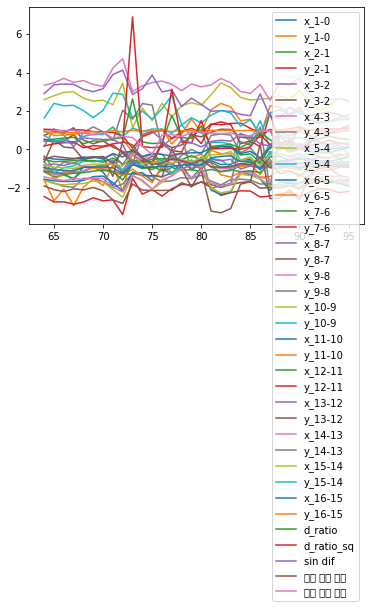

In [203]:
ex= train[train['id']==0]
ex.iloc[:,:-2].plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_

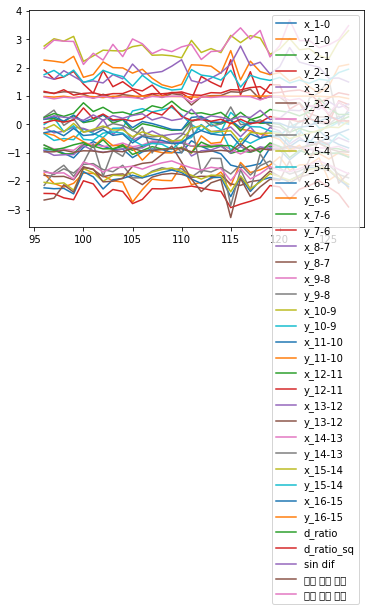

In [204]:
ex= train[train['id']==1]
ex.iloc[:,:-2].plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_

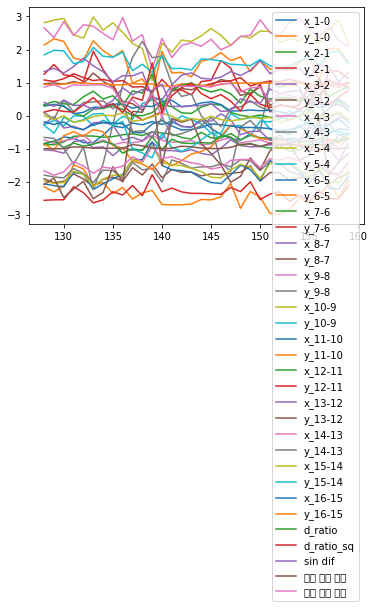

In [205]:
ex= train[train['id']==2]
ex.iloc[:,:-2].plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_

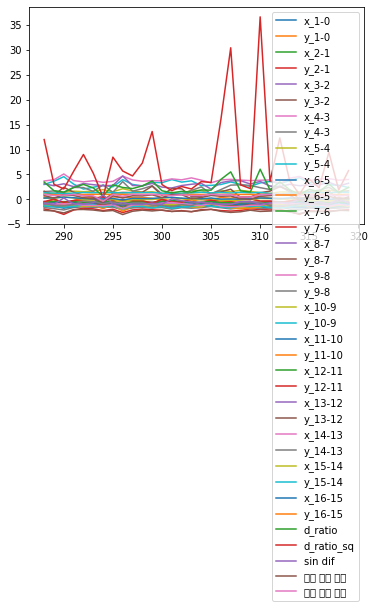

In [206]:
ex= train[train['id']==5]
ex.iloc[:,:-2].plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_

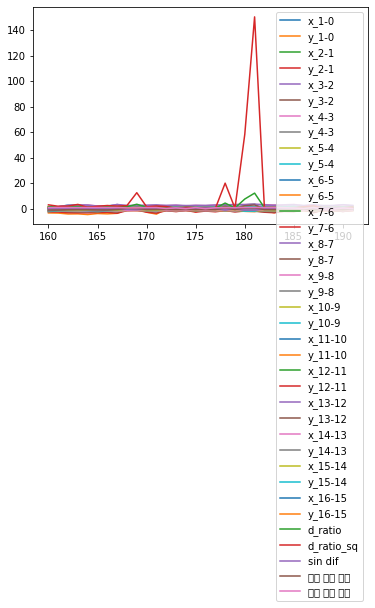

In [207]:
ex= train[train['id']==6]
ex.iloc[:,:-2].plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_

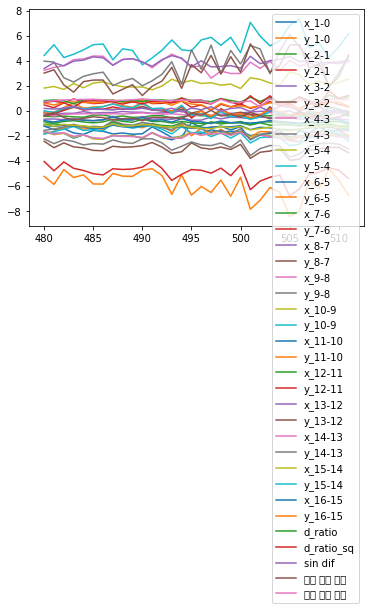

In [208]:
ex= train[train['id']==13]
ex.iloc[:,:-2].plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_

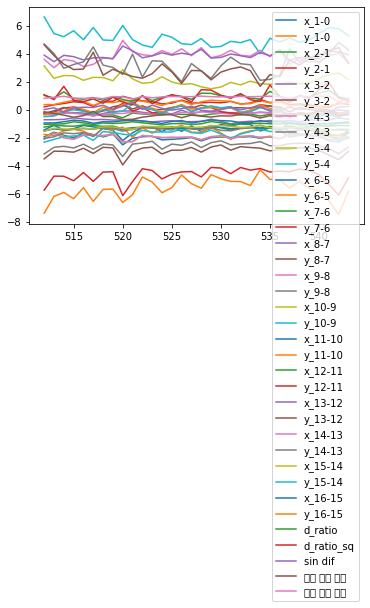

In [209]:
ex= train[train['id']==14]
ex.iloc[:,:-2].plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_

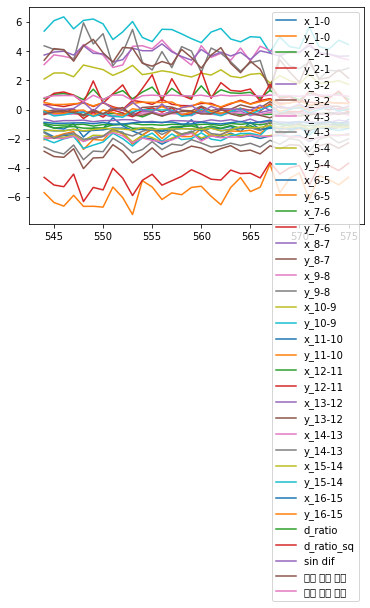

In [210]:
ex= train[train['id']==15]
ex.iloc[:,:-2].plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_

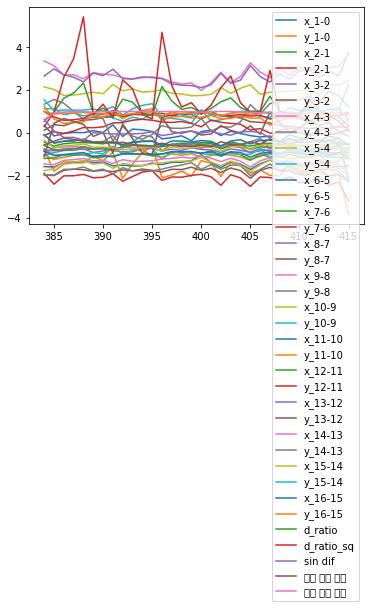

In [211]:
ex= train[train['id']==19]
ex.iloc[:,:-2].plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_

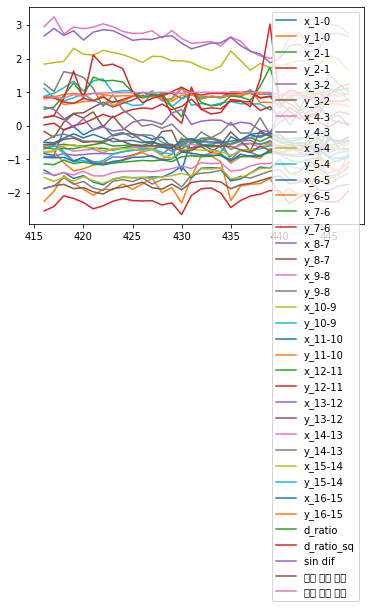

In [212]:
ex= train[train['id']==20]
ex.iloc[:,:-2].plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_

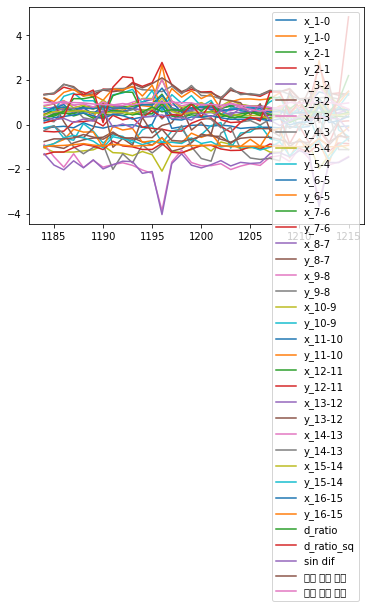

In [213]:
ex= train[train['id']==40]
ex.iloc[:,:-2].plot()

# 모델구축

In [214]:
#train=scaler.fit_transform(train.iloc[:,:-2])

In [215]:
#test=scaler.fit_transform(test.iloc[:,:-2])

In [216]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [217]:
X=tf.reshape(np.array(train.iloc[:,:-2]),[-1, 32, 37]) # 마지막은 열 개수
X.shape

#43,32,35

TensorShape([43, 32, 37])

In [218]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

#43,2

(43, 2)

In [219]:
model = Sequential()
model.add(LSTM(32, input_shape=(32,37))) #개수, 열
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax')) #label 개수

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [220]:
model.fit(X,y, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.7839 - accuracy: 0.2941 - val_loss: 0.7436 - val_accuracy: 0.4444
Epoch 2/20
1/1 [==============================] - 0s 58ms/step - loss: 0.6723 - accuracy: 0.6765 - val_loss: 0.6650 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 42ms/step - loss: 0.6162 - accuracy: 0.8529 - val_loss: 0.5987 - val_accuracy: 0.7778
Epoch 4/20
1/1 [==============================] - 0s 37ms/step - loss: 0.5714 - accuracy: 0.8529 - val_loss: 0.5584 - val_accuracy: 0.7778
Epoch 5/20
1/1 [==============================] - 0s 40ms/step - loss: 0.5311 - accuracy: 0.8529 - val_loss: 0.5101 - val_accuracy: 0.7778
Epoch 6/20
1/1 [==============================] - 0s 37ms/step - loss: 0.4926 - accuracy: 0.8824 - val_loss: 0.4735 - val_accuracy: 0.7778
Epoch 7/20
1/1 [==============================] - 0s 43ms/step - loss: 0.4570 - accuracy: 0.9412 - val_loss: 0.4437 - val_accuracy: 0.7778
Epoch 8/20
1/1 [=============

In [221]:
y #왼쪽 올바르지 않은, 오른쪽 올바른

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [222]:
test_X=tf.reshape(np.array(test.iloc[:,:-2]),[-1, 32, 37]) # 마지막은 열 개수
test_X.shape

TensorShape([13, 32, 37])

In [223]:
prediction = model.predict(test_X)

In [224]:
prediction.shape

#13, 2

(13, 2)

In [225]:
test_labels.iloc[:,2:]=prediction

In [226]:
test_labels

,id,label,0,1
4,10,0,0.636788,0.363212
3,11,0,0.626471,0.373529
2,12,0,0.077408,0.922592
12,46,1,0.402222,0.597778
11,47,1,0.608456,0.391544
10,48,1,0.177450,0.822550
9,49,1,0.112808,0.887192
8,50,1,0.049152,0.950848
7,51,1,0.044362,0.955638
6,52,1,0.082721,0.917279
